# Final Project :  Classifying Email as Spam or Non-Spam

- Context: Spam Detection

- Supervised Algorithm of Classification Type

- Our target variable "spam" can only take 2 values, for example, 0 or 1.

If df["spam"]  = 0, then the email is not spam.

If  df["spam"] = 1, then the email is spam.

- We have 2 classes, making it a binary classification.

# Table of contents
- Data pre-processing
- Data visualization
- Modeling
- Comparative Analysis of Model Performance Metrics

# 1. Data pre-processing

Encoding, normalization, imputation…

## 1.1 Load Dataset

In [15]:
import pandas as pd

data = pd.read_csv("spambase.data", sep = ',', header= None )
data.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [16]:
df = data.copy()

In [17]:
df.columns  = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d",
                      "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet",
                      "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will",
                      "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free",
                      "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
                      "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp",
                      "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs",
                      "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
                      "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re",
                      "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(",
                      "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average",
                      "capital_run_length_longest", "capital_run_length_total", "spam"]
df.head(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## 1.2 Data Cleaning

In [23]:
df.shape

(4601, 58)

4601 lignes 

58 colonnes

<Axes: ylabel='count'>

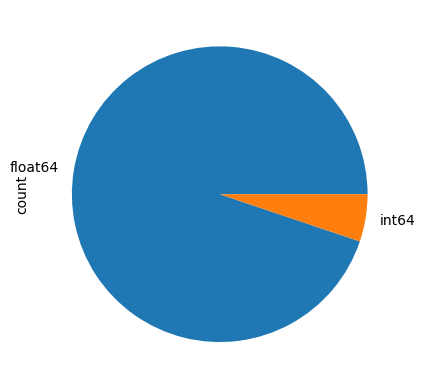

In [24]:
df.dtypes.value_counts().plot.pie()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

### Columns description

We have the following columns:

- Word frequency

48 continuous real attributes of type word_freq_WORD => percentage of words in the e-mail that match WORD

Ex:

word_freq_free: Word frequency of "free" in the email.

word_freq_business: Word frequency of "business" in the email.

word_freq_money: Word frequency of "money" in the email.

- Character frequency

6 continuous real attributes of type char_freq_CHAR = percentage of characters in the e-mail that match CHAR

Ex: 

char_freq_;: Frequency of the character ";" in the email.

char_freq_!: Frequency of the character "!" in the email.


- Sequence length

1 continuous real attribute of type capital_run_length_average = average length of uninterrupted sequences of capital letters

1 continuous integer attribute of type capital_run_length_longest = length of longest uninterrupted sequence of capital letters

1 continuous integer attribute of type capital_run_length_total = total number of capital letters in the e-mail

Ex: 

capital_run_length_average: Average length of uppercase sequences.

capital_run_length_longest: Length of the longest uppercase sequence.

capital_run_length_total: Total length of uppercase sequences.


- 1 nominal {0,1} class attribute of type spam

spam: Binary target variable indicating whether the email is spam (1) or not (0).

### Descriptive statistics for our columns

In [26]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


## 1.3 Data pre-processing: Data Encoding 


Categorical Variable Encoding Not Required

All our variables are already numeric, so this step is not necessary

## 1.4 Data pre-processing: Imputation of missing data

we identify and summarize the count of missing values in each column of the DataFrame

In [27]:
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

We notice that our dataset does not contain any missing values. Therefore, the imputation step is not necessary.

 ## 1.5 Data pre-processing: Normalizing Data

The values are significantly higher in columns such as 'capital_run_length_longest,' 'capital_run_length_total,' and 'capital_run_length_average' compared to other columns.

We need to perform data scaling. Scaling ensures that all features contribute equally to the model training, especially when using feature-sensitive algorithms.

Among common methods, MinMaxScaler is preferred in this context. It normalizes the data to a specific range, typically between 0 and 1, preserving relative differences while maintaining the data distribution.

In [18]:
from sklearn.preprocessing import MinMaxScaler
 
minmax_scaler = MinMaxScaler()
 

df[df.columns] = minmax_scaler.fit_transform(df[df.columns])
 

print("DataFrame after Min-Max scaling :")
df.head()

DataFrame after Min-Max scaling :


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.000000,0.044818,0.125490,0.0,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.023955,0.000000,0.000000,0.002502,0.006007,0.017487,1.0
1,0.046256,0.019608,0.098039,0.0,0.014,0.047619,0.028886,0.006301,0.000000,0.051705,...,0.000000,0.013536,0.0,0.011454,0.029985,0.002421,0.003735,0.010012,0.064836,1.0
2,0.013216,0.000000,0.139216,0.0,0.123,0.032313,0.026135,0.010801,0.121673,0.013751,...,0.002281,0.014664,0.0,0.008498,0.030651,0.000504,0.008008,0.048458,0.142551,1.0
3,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.000000,0.014048,0.0,0.004218,0.000000,0.000000,0.002303,0.003905,0.011995,1.0
4,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.000000,0.013843,0.0,0.004157,0.000000,0.000000,0.002303,0.003905,0.011995,1.0


It is preferable to apply MinMaxScaler to all columns.Indeed, it allows: 
- Preservation of Data Distribution
- Avoiding Imbalance Issues

# 2. Data visualization
Showing the link between the variables and the target.

## 2.1 Class Distribution Plot

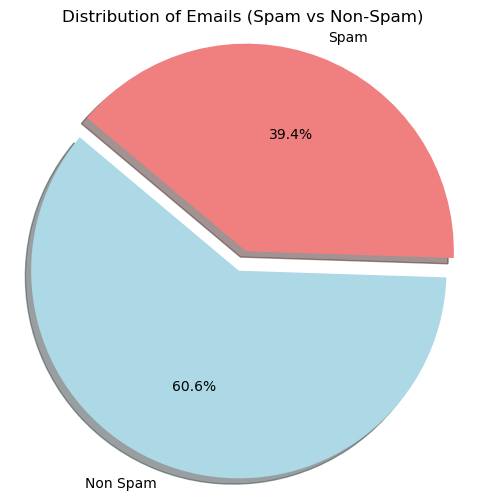

In [5]:
import matplotlib.pyplot as plt

value_counts = df['spam'].value_counts(normalize=True)

labels = ['Non Spam', 'Spam']

colors = ['lightblue', 'lightcoral']

explode = (0.1, 0)

plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Emails (Spam vs Non-Spam)')

plt.axis('equal')
plt.show()


### Examination of the target column

In [31]:
df['spam'].describe()

count    4601.000000
mean        0.394045
std         0.488698
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: spam, dtype: float64

In [32]:
df['spam'].value_counts(normalize=True)

spam
0.0    0.605955
1.0    0.394045
Name: proportion, dtype: float64

We notice that there are 39.4% of spam's email and 60.6% of non spam's email

## 2.2  Correlation matrix

<Axes: >

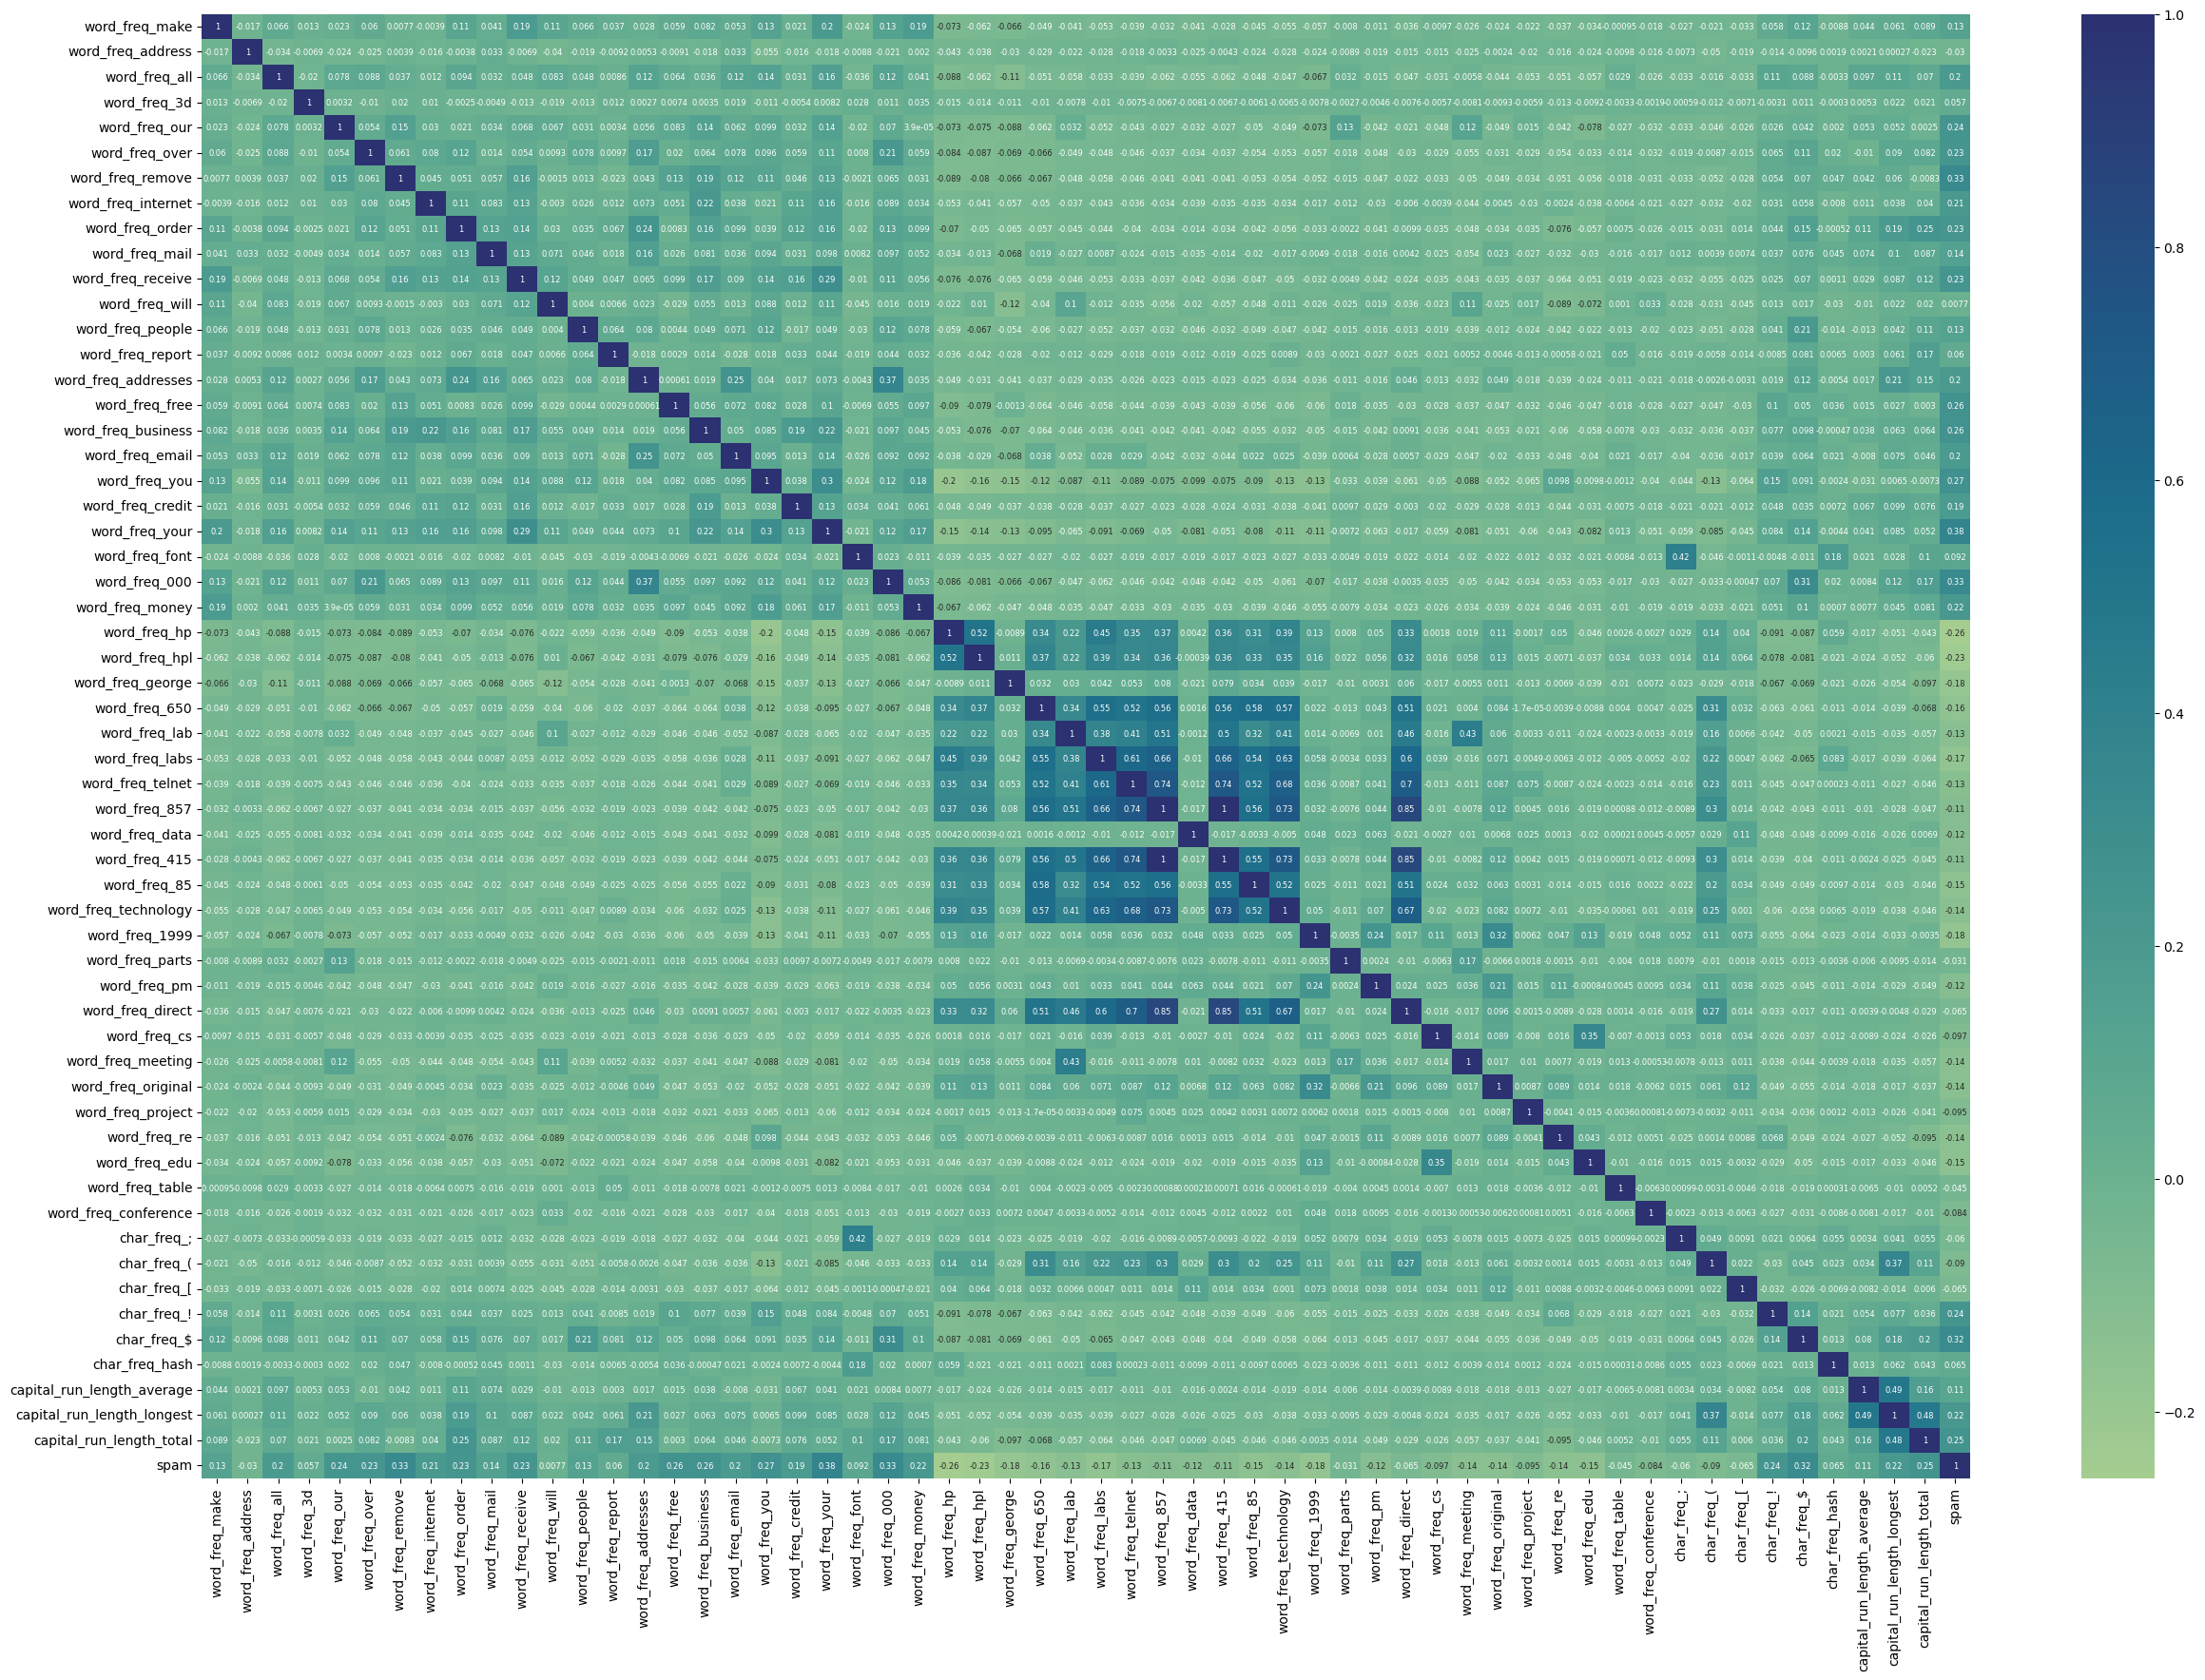

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr, annot = True, cmap='crest',annot_kws={"fontsize": 6})

The columns associated with word and character frequencies are important as they provide quantitative indicators of the content of emails, which are crucial in studying the characteristics and patterns associated with spam

### Correlation Analysis: We want to identify the Top 15 Variables Most Correlated with 'spam'"

Using the nlargest Method to Obtain the 15 Largest Absolute Correlation Values with the 'spam' Variable. This returns the names of corresponding columns in descending order of correlation (from most positively correlated to least correlated).

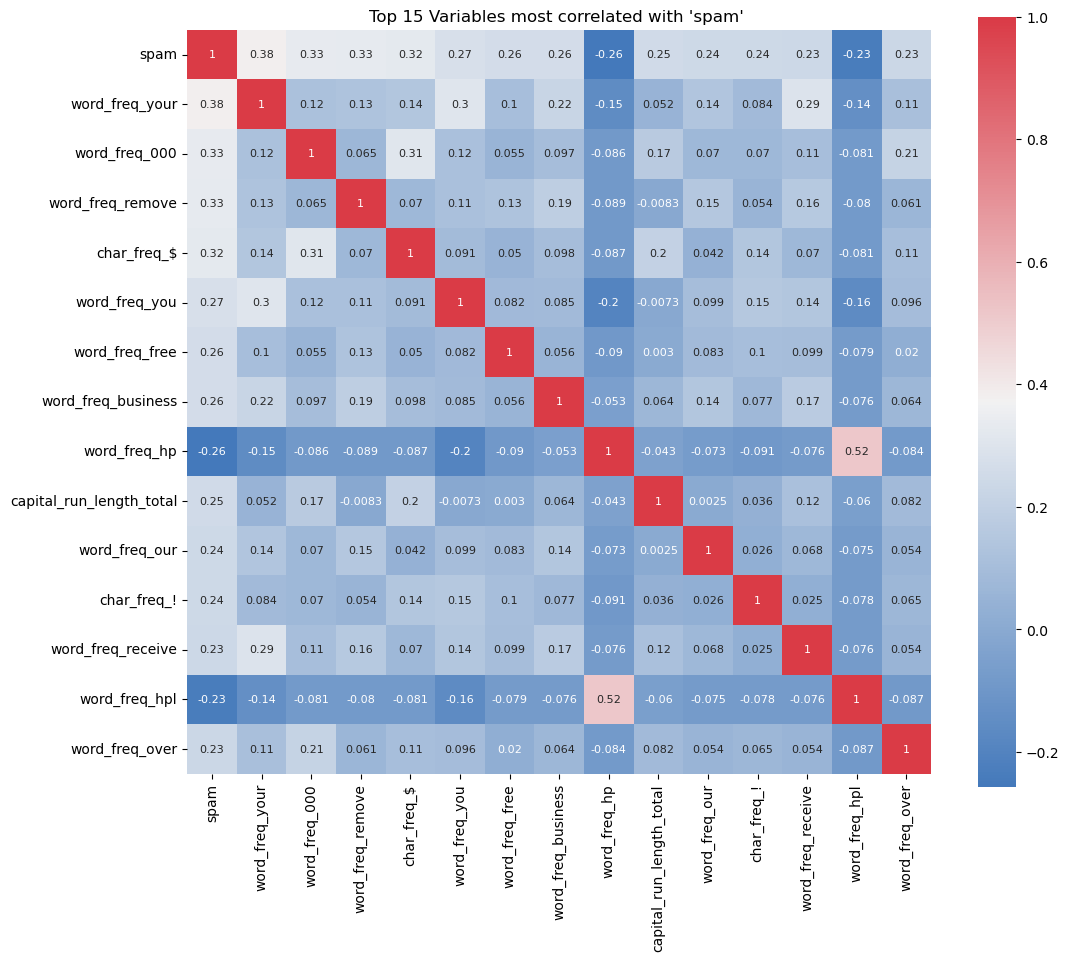

In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 
k = 15  
cols = corr.abs().nlargest(k, 'spam')['spam'].index

cm = np.corrcoef(df[cols].values.T)
 
plt.figure(figsize=(12, 10))
 
ax = sns.heatmap(cm, yticklabels=cols.values, xticklabels=cols.values,
                 cmap=sns.diverging_palette(250, 10, as_cmap=True),
                 annot=True, square=True, annot_kws={"fontsize": 8})
 
ax.set(title=f"Top {k} Variables most correlated with 'spam' ")
 
plt.show()

Correlation with Spam: Several features show moderate to strong correlation with the 'spam' variable, such as 'word_freq_your' (0.38) and 'word_freq_000' (0.33). These features are likely to be important predictors in a spam prediction model.
 


### Sub-Dataframe Creation: Spam or Non-Spam for Visualization

In this Jupyter Notebook, we have implemented a strategic approach by creating two sub-dataframes, namely 'spam_df' and 'non_spam_df,'


This separation into sub-dataframes is done for the purpose of analysis and visualization, making it easier to study the characteristics and patterns associated with spam and non-spam emails independently.

In [7]:
spam_df = df[df['spam'] == 1]
non_spam_df = df[df['spam'] == 0]

spam_df:  DataFrame extracted from the original (df) where 'spam' is 1. This DataFrame includes only data examples marked as spam.

non_spam_df:  DataFrame extracted from the original (df) where 'spam' is 0. This DataFrame includes only data examples marked as non-spam

## Most Common Words for Spam Emails

In [22]:
import re

# Function to extract the last word after the last "_"
def Extract_names(column_names):
    words = []
    for col in column_names:
        #Using a regular expression to extract the last word after the last underscore
        match = re.search(r'([^_]+)$', col)
        if match:
            last_word = match.group(1)
            words.append(last_word)
    return words




#Calculate the mean frequency of occurrence
average = spam_df.iloc[:, :48].sum().mean()

print("Average : ", average)

#Filter the most common words among the columns 'word_freq_WORD' for spam emails
most_common_spam = spam_df.iloc[:, :48].sum().sort_values(ascending=False)
most_common_spam = most_common_spam[most_common_spam > average]

mcs_last_words = Extract_names(most_common_spam.index)

#Create a dataframe to display words and their associated frequencies
mcs_df = pd.DataFrame({'Word': mcs_last_words, 'Frequency': most_common_spam})

mcs_df

Average :  35.853994396439305


,Word,Frequency
word_freq_your,your,225.257426
word_freq_you,you,218.965867
word_freq_all,all,143.545098
word_freq_will,will,103.112720
word_freq_our,our,93.180000
word_freq_receive,receive,82.268199
word_freq_000,000,82.185321
word_freq_business,business,73.004202
word_freq_remove,remove,68.680880
word_freq_email,email,63.669967


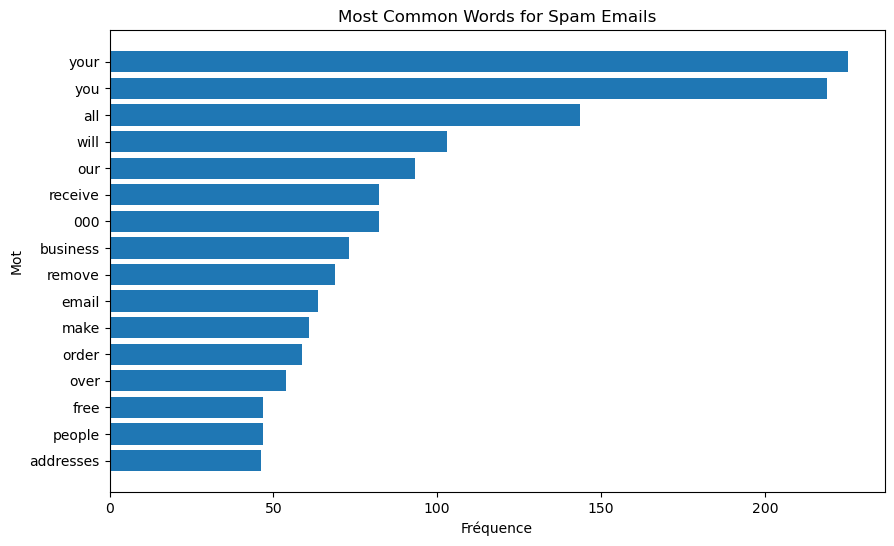

In [10]:
import matplotlib.pyplot as plt

#Visualization of the most common words in spam emails
plt.figure(figsize=(10, 6))
plt.barh(mcs_df['Mot'], mcs_df['Fréquence'])
plt.xlabel('Fréquence')
plt.ylabel('Mot')
plt.title('Most Common Words for Spam Emails')
plt.gca().invert_yaxis()  #Invert the order of words to display the most common ones at the top
plt.show()

The terms "your," "you," and "free" appear most frequently, suggesting that they are commonly used in spam to grab the recipient's attention or offer enticing deals "business". This visualization helps identify keywords potentially associated with unwanted emails.

## WordCloud

### WordCloud - spam_df

In [104]:
spam_df.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


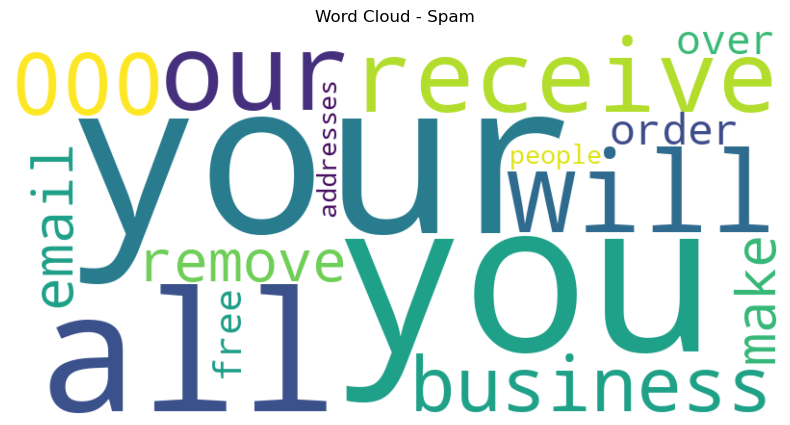

In [98]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
 
#average frequency of occurrence for words in spam emails
average = spam_df.iloc[:, :48].sum().mean()
 
# Filter the most common words among the columns 'word_freq_WORD' for spam emails
most_common_spam = spam_df.iloc[:, :48].sum().sort_values(ascending=False)
most_common_spam = most_common_spam[most_common_spam > average]
 
def extract_words_with_frequencies(column_names, frequencies):
    words_with_freq = {}
    for col in column_names:
        match = re.search(r'([^_]+)$', col)
        if match:
            last_word = match.group(1)
            words_with_freq[last_word] = frequencies[col]
    return words_with_freq
 
#Dict for words and their frequencies
words_with_freq = extract_words_with_frequencies(most_common_spam.index, most_common_spam)
 
def generate_wordcloud_with_frequencies(frequencies, title):
    #Word cloud based on frequencies
    wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate_from_frequencies(frequencies)
 
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()
    
generate_wordcloud_with_frequencies(words_with_freq, 'Word Cloud - Spam')

This word cloud visually represents the most frequent terms in spam. The larger a word appears in the cloud, the higher its frequency in the analyzed data. Words like 'you,' 'your,' 'free,' and 'our' are highlighted, indicating that they are particularly common in spam. This visualization is helpful for quickly identifying key terms that could be used to filter or flag unwanted emails

## Most Common Words for Non Spam Emails

In [21]:
average_non_spam = non_spam_df.iloc[:, :48].sum().mean()

print("Mean word occurrence frequency for non spam : " , average_non_spam)

mc_nspam = non_spam_df.iloc[:, :48].sum().sort_values(ascending=False)
mc_nspam = mc_nspam[mc_nspam > average_non_spam]

mcns_last_words = Extract_names(mc_nspam.index)

mcns_df = pd.DataFrame({'Word': mcns_last_words, 'Frequency': mc_nspam})

mcns_df

Mean word occurrence frequency for non spam :  42.44706114236745


,Word,Frequency
word_freq_you,you,188.891200
word_freq_will,will,154.629783
word_freq_hp,hp,119.855017
word_freq_your,your,110.090009
word_freq_all,all,109.650980
word_freq_george,george,105.837384
word_freq_1999,1999,80.015965
word_freq_labs,labs,78.639456
word_freq_hpl,hpl,72.292917
word_freq_650,650,59.442244


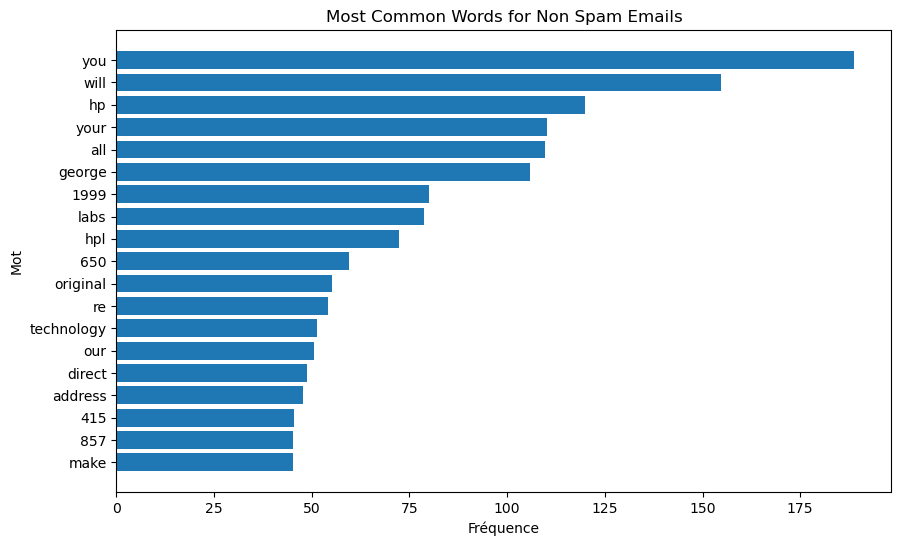

In [12]:
plt.figure(figsize=(10, 6))
plt.barh(mcns_df['Mot'], mcns_df['Fréquence'])
plt.xlabel('Fréquence')
plt.ylabel('Mot')
plt.title('Most Common Words for Non Spam Emails')
plt.gca().invert_yaxis() 
plt.show()

The terms like 'you,' 'will,' and 'your' are common, but there are also specific references such as 'hp' and 'george,' which could indicate proper nouns or technical terms related to a specific company or person. This clearly shows that these emails are legitimate (non-spam).

### WordCloud - non_spam_df

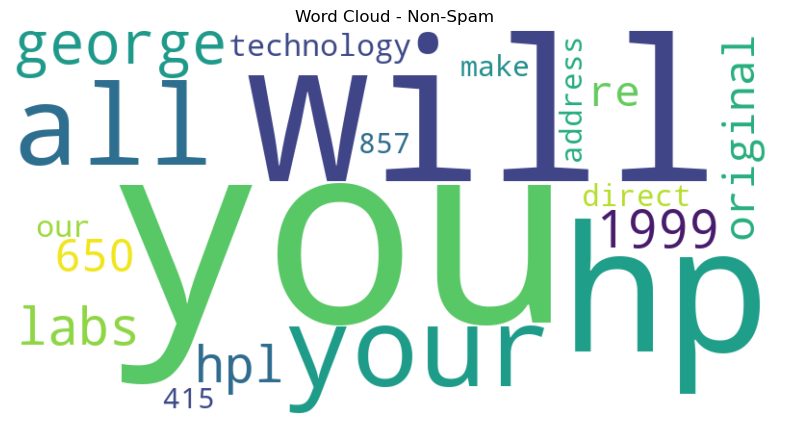

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
 
average_non_spam = non_spam_df.iloc[:, :48].sum().mean()
 
mc_nspam = non_spam_df.iloc[:, :48].sum().sort_values(ascending=False)
mc_nspam = mc_nspam[mc_nspam > average_non_spam]
 
 
def extract_words_with_frequencies(column_names, frequencies):
    words_with_freq = {}
    for col in column_names:
        match = re.search(r'([^_]+)$', col)
        if match:
            last_word = match.group(1)
            words_with_freq[last_word] = frequencies[col]
    return words_with_freq
 
def generate_wordcloud_with_frequencies(frequencies, title):
    wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate_from_frequencies(frequencies)
 
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

words_with_freq = extract_words_with_frequencies(mc_nspam.index,mc_nspam)

generate_wordcloud_with_frequencies(words_with_freq, 'Word Cloud - Non-Spam')

The word cloud visually represents the most frequent terms in non-spam. 'hp,' 'you,' and 'will' are highly predominant, suggesting they are significant terms in regular non-spam communication. Terms like '1999,' 'labs,' and numbers such as '650' and '857' could represent years, product names, or specific codes related to an organization or technical context.

### Average Frequency of Words  According to Email Categories: Spam and Non-Spam

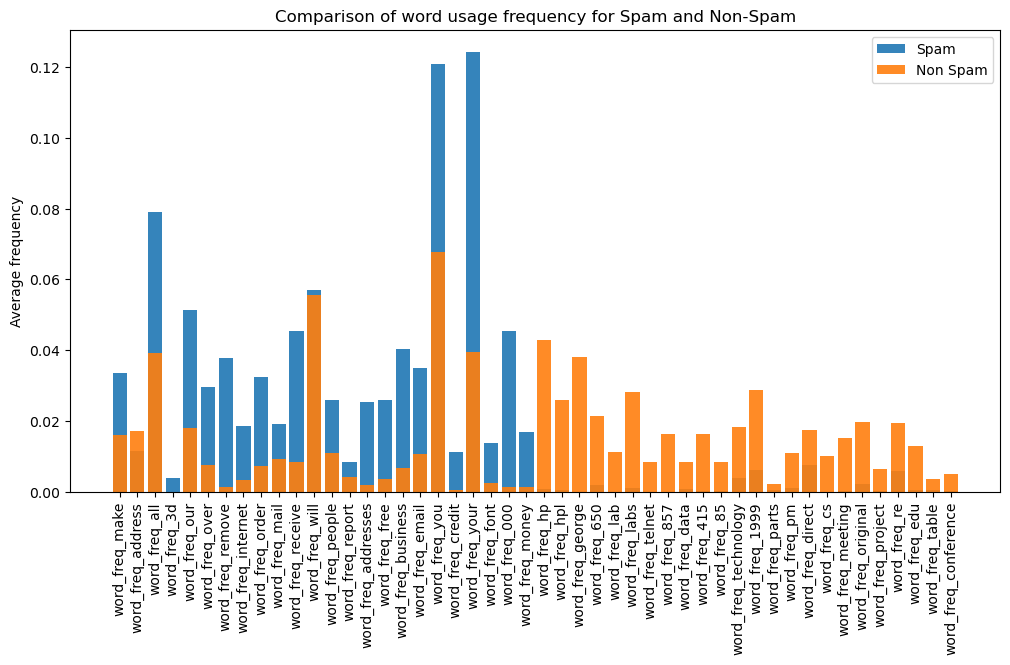

In [23]:
spam_word_frequency = spam_df.iloc[:, :48].mean(axis=0)
non_spam_word_frequency = non_spam_df.iloc[:, :48].mean(axis=0)
 
column_names = df.columns[:48] 
 
plt.figure(figsize=(12, 6))
plt.bar(range(len(spam_word_frequency)), spam_word_frequency, alpha=0.9, label='Spam')
plt.bar(range(len(non_spam_word_frequency)), non_spam_word_frequency, alpha=0.9, label='Non Spam')
plt.ylabel("Average frequency")
plt.title("Comparison of word usage frequency for Spam and Non-Spam")
plt.xticks(range(len(column_names)), column_names,rotation='vertical') 
plt.legend()
plt.show()

Some words, such as 'money,' 'business,' 'credit,' 'remove,' and 'receive,' associated with urgency or financial appeal, appear to be much more frequent in spam emails than in non-spam emails.

Conversely, other words may be more common in non-spam emails, such as 'george,' 'hpl,' '847,' suggesting a more everyday language in regular communications.

The height of the bars indicates the relative frequency of each word, with certain words being significantly more frequent in one category or the other, which could help differentiate spam from legitimate emails.

### Distribution of Specific Characters in Spam and Non-Spam Emails

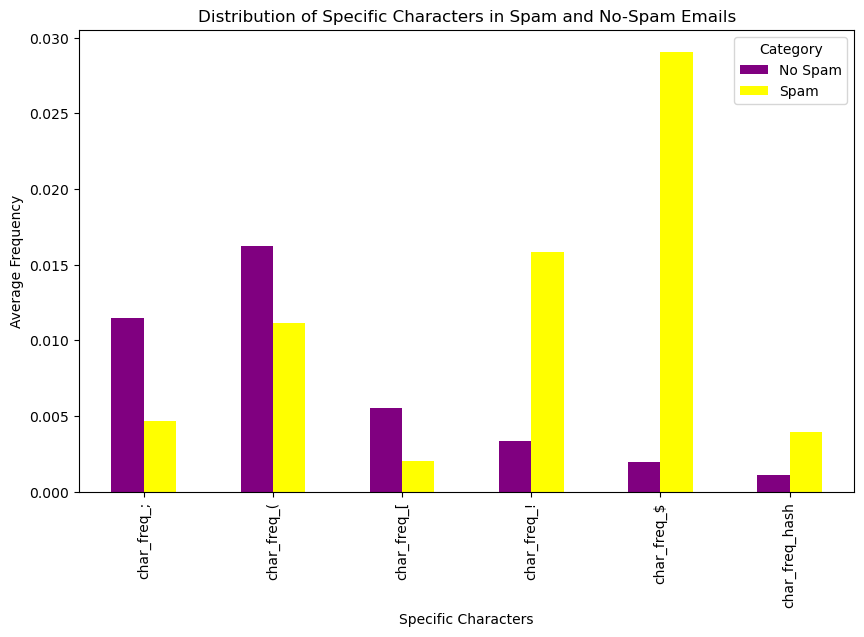

In [37]:
import matplotlib.pyplot as plt

char_columns = ['char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_hash']


ax = df.groupby('spam')[char_columns].mean().T.plot(kind='bar', color=['purple', 'yellow'], figsize=(10, 6))
plt.title('Distribution of Specific Characters in Spam and No-Spam Emails')
plt.xlabel('Specific Characters')
plt.ylabel('Average Frequency')


l = ['No Spam', 'Spam']
ax.legend(labels=l, title='Category')

plt.show()

The visualization shows a significant difference in the frequency of specific characters, namely '!' and '$'  , between spam and non-spam emails, with a much higher frequency in spam. This suggests that these characters could be important indicators for distinguishing spam.

=> The high frequency of '!' in spam emails is indicative of attempts to grab attention or convey a sense of urgency, two tactics often employed in unwanted emails to prompt recipients to act quickly.

=> The prevalence of the '$' character, marked in spam emails, is consistent with common techniques used in spam to draw attention to potential financial gains or easy money opportunities.

Other characters have relatively similar frequencies between the two categories, suggesting that they may be less discriminatory.

# Analysis of capital sequences.

Let's focus on analyzing the three columns related to uppercase sequences: 


- capital_run_length_total

- capital_run_length_longest

- capital_run_length_average

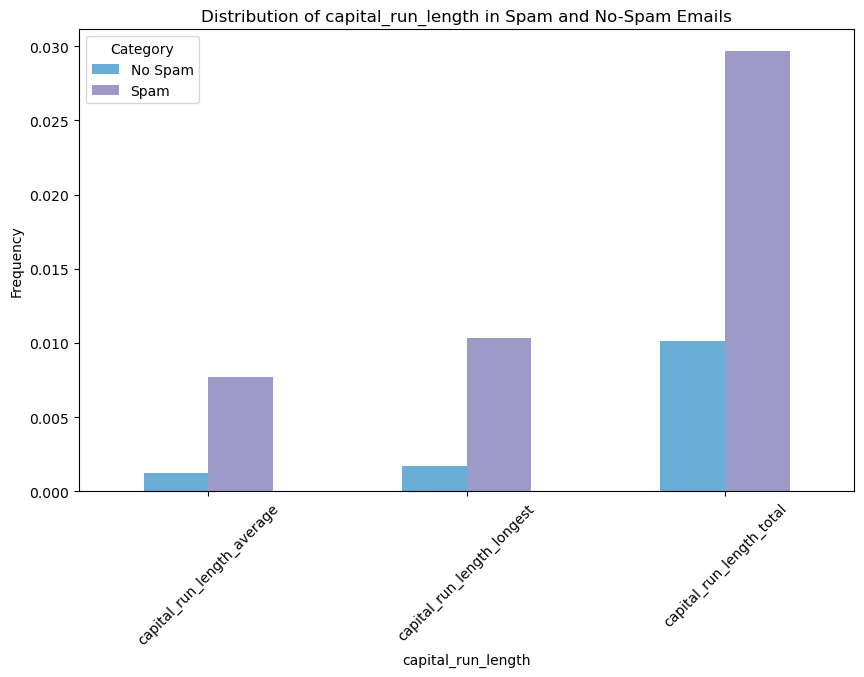

In [26]:
import matplotlib.pyplot as plt

char_columns = ['capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total']
 
blue_light = plt.cm.Blues(0.5)  
purple_light = plt.cm.Purples(0.5) 
 
# Plot
ax = df.groupby('spam')[char_columns].mean().T.plot(kind='bar', color=[blue_light, purple_light], figsize=(10, 6))
plt.title('Distribution of capital_run_length in Spam and No-Spam Emails')
plt.xlabel('capital_run_length')
plt.ylabel('Frequency')

l = ['No Spam', 'Spam']
ax.legend(labels=l, title='Category')
ax.set_xticklabels(char_columns, rotation=45)
 
plt.show()

capital_run_length_average: Non-spam emails tend to have shorter sequences of capital letters on average than spam.

capital_run_length_average_longest: There is a less pronounced difference between spam and non-spam for the longest sequence of capital letters, although spams tend to have longer sequences.

capital_run_length_average_total: The total length of capital letter sequences is significantly higher in spam emails compared to non-spam, suggesting that excessive use of capital letters is a common feature of spams.

This bar plot can be useful for identifying features to use in a spam detection model. It indicates that the use of capital letters is more frequent and intensive in spams than in legitimate emails.

# 3. Modeling

use the scikit-learn library to try several algorithms, change the hyper parameters, do a grid search, compare the results of your models using graphics

- XGBClassifier (Xgboost Classification)

- LogisticRegression 

- RandomForestClassifier

- Support Vector Classification

For each model, we will assess and compare the following metrics.

Metrics comparison: 


- AUC-ROC 

- F1-score

- precision

We use the AUC-ROC as a metric because this metric is used for binary classification.
Our subject is based on this type of classification 

In [ ]:
#pip install xgboost

# XGBoost 

We prepare the data for the application of the XGBoost algorithm, by cleaning and standardizing column names through the replacement of certain special characters with underscores.

In [40]:
df.columns = [name.replace('[', '_').replace(']', '_').replace('<', '_') for name in df.columns]

df.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [41]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq__,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.000000,0.044818,0.125490,0.0,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.023955,0.000000,0.000000,0.002502,0.006007,0.017487,1.0
1,0.046256,0.019608,0.098039,0.0,0.014,0.047619,0.028886,0.006301,0.000000,0.051705,...,0.000000,0.013536,0.0,0.011454,0.029985,0.002421,0.003735,0.010012,0.064836,1.0
2,0.013216,0.000000,0.139216,0.0,0.123,0.032313,0.026135,0.010801,0.121673,0.013751,...,0.002281,0.014664,0.0,0.008498,0.030651,0.000504,0.008008,0.048458,0.142551,1.0
3,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.000000,0.014048,0.0,0.004218,0.000000,0.000000,0.002303,0.003905,0.011995,1.0
4,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.000000,0.013843,0.0,0.004157,0.000000,0.000000,0.002303,0.003905,0.011995,1.0


### import libraries

In [42]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

###  Split the Data into Training and Testing Sets 

In [43]:
X = df.drop('spam', axis=1) #features
y = df['spam'] #target
 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
 

### Grid Search for Hyperparameter Tuning

In [44]:
feature_names = list(X_train.columns)
 

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names)
 

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}
 

xgb_model = xgb.XGBClassifier()
 

grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=5, scoring='accuracy')
 

grid_search.fit(X_train, y_train)
 

best_params = grid_search.best_params_
 
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}


### Create and Train the Best  XGBoost  Model

In [45]:
best_model_xgb = xgb.XGBClassifier(**best_params)
 

best_model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Model Evaluation 

In [46]:
y_pred = best_model_xgb.predict(X_test)
 

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

### ROC Curve and AUC Calculation

In [47]:
y_pred_prob = best_model_xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

### Visualize the confusion matrix

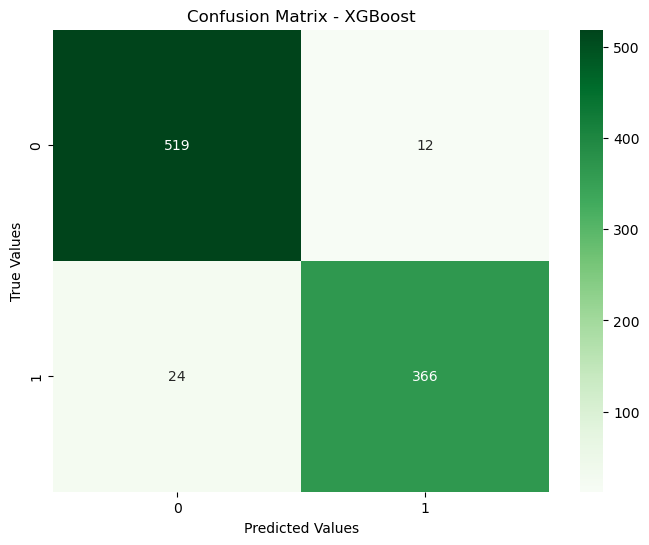

In [48]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix - XGBoost')
plt.show()
 

Confusion matrices are used to assess the performance of classification algorithms. Here are the key components for the XGBoost model:

- True Positives: The model correctly predicted 366 cases as class 1 (e.g., spam).
- True Negatives: The model correctly predicted 519 cases as class 0 (e.g., non-spam).
- False Positives: The model incorrectly predicted 12 cases as class 1.
- False Negatives: The model incorrectly predicted 24 cases as class 0.

The model appears to have good performance, with a high number of true positives and true negatives and a relatively low number of false positives and false negatives.

### Visualization of the ROC curve

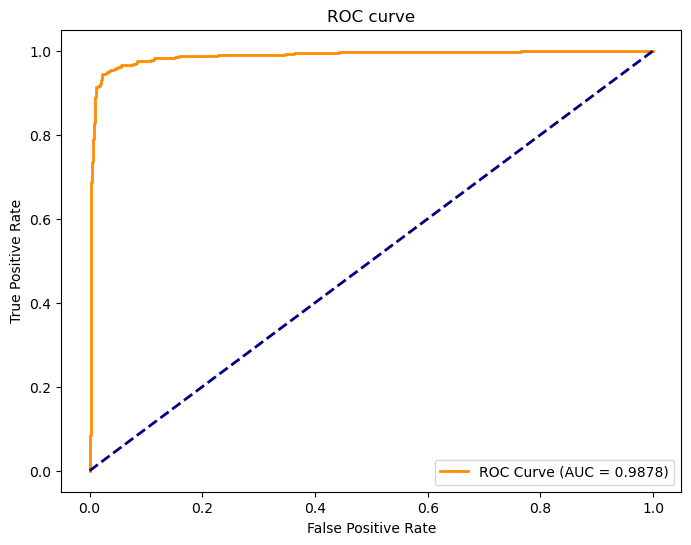

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()

The graph depicts a Receiver Operating Characteristic (ROC) curve for a classification model with an Area Under the Curve (AUC) of 0.9878. The ROC curve is a graphical tool to evaluate the performance of a binary classification model, plotting the true positive rate against the false positive rate at different classification thresholds.

Key points from this ROC curve:

- AUC close to 1: An AUC of 0.9878 is very close to the perfect value of 1, indicating excellent model performance.
- Curve above the diagonal: The curve is well above the blue dashed line, representing a random classifier (AUC = 0.5). The farther the curve from this line, the better the performance.

**Interpretation**: This curve suggests that the model has an excellent discrimination rate, effectively separating positive and negative classes.

###  Display Metrics

In [49]:
print(f"Accuracy with the best XGBoost model: {accuracy:.4f}")
print("Confusion Matrix:")
print(confusion)
 

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy with the best XGBoost model: 0.9609
Confusion Matrix:
[[519  12]
 [ 24 366]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       531
         1.0       0.97      0.94      0.95       390

    accuracy                           0.96       921
   macro avg       0.96      0.96      0.96       921
weighted avg       0.96      0.96      0.96       921



### Learning curve 

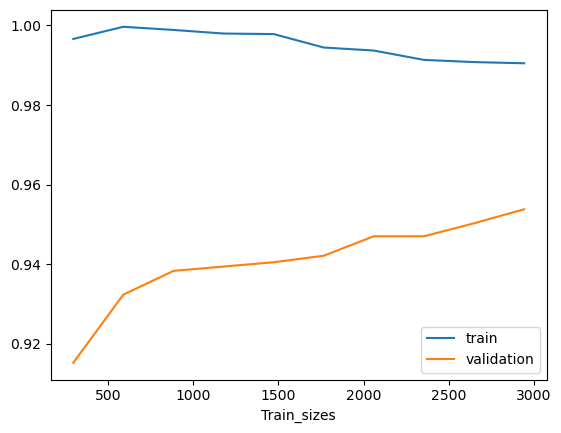

In [51]:
from sklearn.model_selection import learning_curve

N, train_scores, val_scores = learning_curve(best_model_xgb, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
plt.plot(N, train_scores.mean(axis=1), label="train")
plt.plot(N, val_scores.mean(axis=1), label="validation")
plt.xlabel("Train_sizes")
plt.legend()
plt.show()

The visualization depicts a validation curve for an XGBoost model. Validation curves plot the model's performance (often precision) on training and validation sets against the size of the training set.

Key points from the validation curve:

- Training performance: Precision on the training set remains high and stable, indicating that the model is consistent across different training set sizes.

- Validation performance: Precision on the validation set increases with the size of the training set, suggesting that the model learns better and generalizes better as more data is provided.

- Gap between curves: The gap between training and validation precision decreases as more data is used, indicating a reduction in overfitting.

- Convergence: The curves appear to converge, suggesting that increasing the training set size may not lead to a significant improvement in precision beyond a certain point.

Thus, the model demonstrates good generalization ability, and the current dataset is sufficiently representative to effectively train the model.

# SVC

### import libraries

In [52]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

### Grid Search for Hyperparameter Tuning

In [53]:
param_grid = {
    'C': [0.1, 1, 10],  
    'kernel': ['linear', 'rbf', 'poly']  
}


grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_

print("Best hyperparameters :", best_params)

Best hyperparameters : {'C': 10, 'kernel': 'rbf'}


### Create and Train the Best SVC Model

In [55]:
best_model_SVC = SVC(**best_params)


best_model_SVC.fit(X_train, y_train)


SVC(C=10)

### Model Evaluation

In [56]:
y_pred = best_model_SVC.predict(X_test)


report = classification_report(y_test, y_pred)


accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

### ROC Curve and AUC Calculation

In [57]:
decision_function_scores = best_model_SVC.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y_test, decision_function_scores)
roc_auc = roc_auc_score(y_test, decision_function_scores)


### Visualization of the confusion matrix

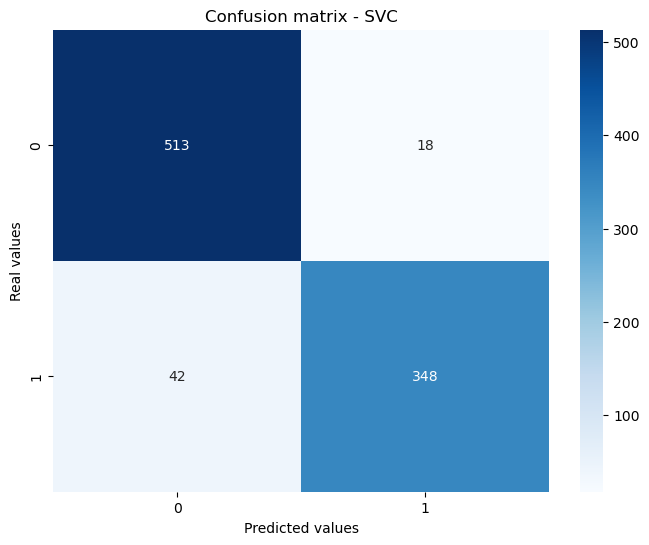

In [58]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues') 
plt.xlabel('Predicted values')
plt.ylabel('Real values')
plt.title('Confusion matrix - SVC')
plt.show()

Confusion Matrix:

- True Positives: The model correctly predicted 513 instances as negative class (0).
- True Negatives: The model correctly predicted 348 instances as positive class (1).
- False Positives: The model incorrectly predicted 18 instances as positive class (1).
- False Negatives: The model incorrectly predicted 42 instances as negative class (0).

Thus, the model is quite good at identifying both classes, but there are some errors, especially in the case of false negatives.

### Visualization of the ROC curve

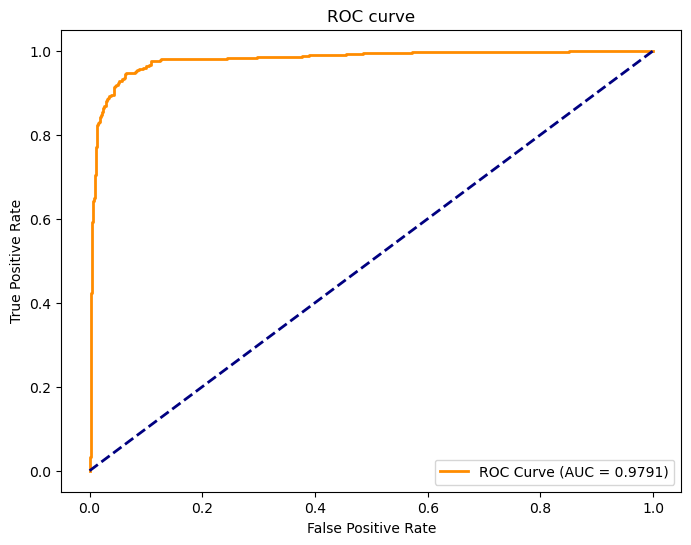

In [59]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()

The ROC curve plots the true positive rate against the false positive rate at different decision thresholds.

The AUC (Area Under Curve) is 0.9791, which is very high, indicating that the model has excellent discriminatory ability between the positive and negative classes.

The curve is significantly away from the line of no-discrimination (dotted line), which is a sign of good performance.

###  Display Metrics

In [60]:
print(f"Accuracy with the best SVC model: {accuracy:.4f}")
print("Confusion matrix :")
print(confusion)


print("Classification Report :")
print(report)


Accuracy with the best SVC model: 0.9349
Confusion matrix :
[[513  18]
 [ 42 348]]
Classification Report :
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94       531
         1.0       0.95      0.89      0.92       390

    accuracy                           0.93       921
   macro avg       0.94      0.93      0.93       921
weighted avg       0.94      0.93      0.93       921



### Learning curve

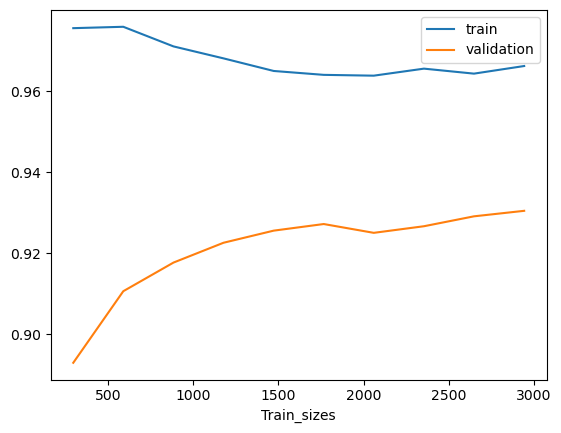

In [61]:
from sklearn.model_selection import learning_curve

N, train_scores, val_scores = learning_curve(best_model_SVC, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
plt.plot(N, train_scores.mean(axis=1), label="train")
plt.plot(N, val_scores.mean(axis=1), label="validation")
plt.xlabel("Train_sizes")
plt.legend()
plt.show()

The validation curve shows how the model's accuracy changes with the size of the training set for both the training and validation sets.

The accuracy on the training set (blue curve) remains relatively stable as the size of the training set increases. The accuracy on the validation set (orange curve) increases with the size of the training set, suggesting improved generalization with more data.

The convergence of the curves indicates that increasing the size of the training set does not lead to significant overfitting.

# RandomForestClassifier

### import libraries

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

### Grid Search for Hyperparameter Tuning

In [64]:
#Hyperparameter grid for the search
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')

# Grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

#Best hyperparameters from the grid search
best_params = grid_search.best_params_

print("Best hyperparameters :", best_params)


Best hyperparameters : {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


### Create and Train the Best RandomForestClassifier Model

In [65]:
best_model_RandomForestClassifier = RandomForestClassifier(**best_params)


best_model_RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

### Model Evaluation

In [66]:
y_pred = best_model_RandomForestClassifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

### ROC Curve and AUC Calculation

In [67]:
y_pred_prob = best_model_RandomForestClassifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

### Confusion matrix visualization

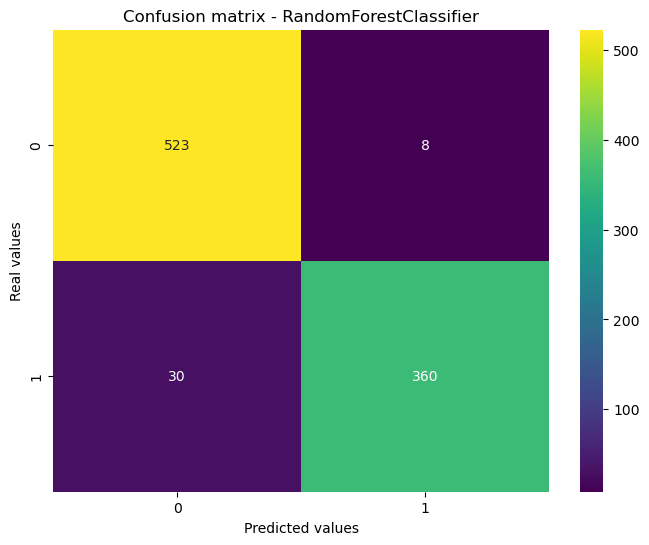

In [68]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted values')
plt.ylabel ('Real values')
plt.title('Confusion matrix - RandomForestClassifier')
plt.show()


Confusion Matrix:

- True Negatives: The model correctly predicted 523 instances as negative class (0).
- False Positives: The model incorrectly predicted 8 instances as positive class (1).
- False Negatives: The model incorrectly predicted 30 instances as negative class (0).
- True Positives: The model correctly predicted 360 instances as positive class (1).

The model demonstrates good performance with a high number of true positives and true negatives and a low number of false positives and false negatives.

### ROC curve visualization

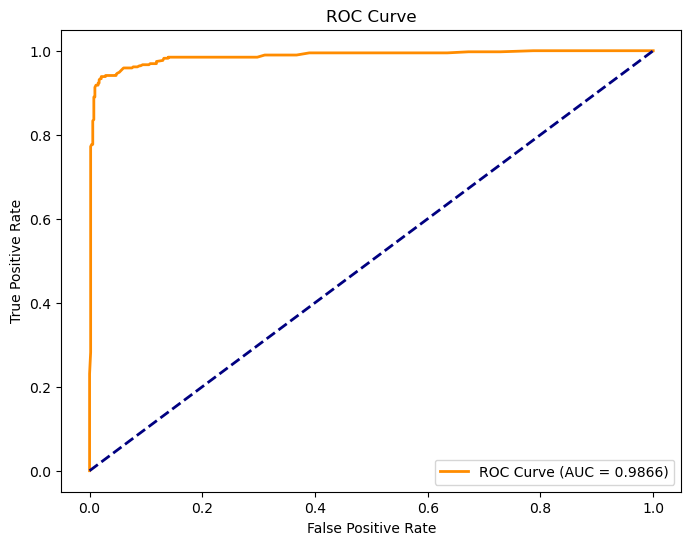

In [69]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

The ROC curve illustrates the model's ability to correctly classify positive and negative classes at different thresholds.

The AUC (Area Under the Curve) is 0.9866, which is very high, indicating excellent class separation capability.

The curve significantly deviates from the diagonal line, demonstrating good model performance.

###  Display Metrics

In [70]:
print(f"Accuracy with the best RandomForestClassifier model: {accuracy:.4f}")
print("Confusion matrix :")
print(confusion)


report = classification_report(y_test, y_pred)
print("Classification Report :")
print(report)

Accuracy with the best RandomForestClassifier model: 0.9587
Confusion matrix :
[[523   8]
 [ 30 360]]
Classification Report :
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96       531
         1.0       0.98      0.92      0.95       390

    accuracy                           0.96       921
   macro avg       0.96      0.95      0.96       921
weighted avg       0.96      0.96      0.96       921



### Learning curve

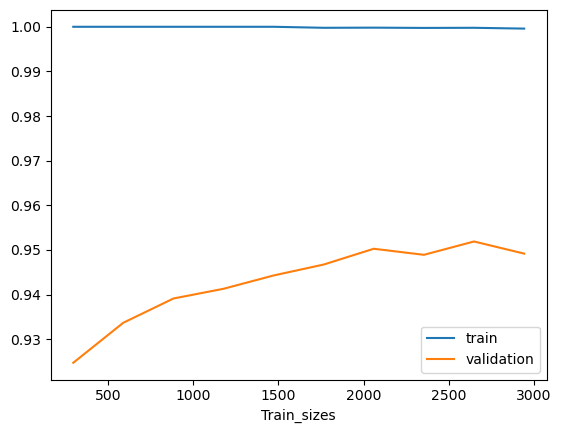

In [71]:
from sklearn.model_selection import learning_curve

N, train_scores, val_scores = learning_curve(best_model_RandomForestClassifier, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
plt.plot(N, train_scores.mean(axis=1), label="train")
plt.plot(N, val_scores.mean(axis=1), label="validation")
plt.xlabel("Train_sizes")
plt.legend()
plt.show()

The validation curve shows the model's accuracy on training and validation sets based on the size of the training set.

The training set accuracy (blue curve) is high and stable, suggesting that the model fits well to the training data. The validation set accuracy (orange curve) increases with the size of the training set, indicating better generalization with more data.

The curves appear to converge, indicating that adding more training data may not significantly improve performance on the validation set.

# LogisticRegression

### import libraries

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

### Grid Search for Hyperparameter Tuning

In [73]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear'],  
}


grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_

print("Best hyperparameters :", best_params)

Best hyperparameters : {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


### Create and Train the Best LogisticRegression Model

In [74]:
best_model_LogisticRegression = LogisticRegression(**best_params)


best_model_LogisticRegression.fit(X_train, y_train)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

### Model Evaluation

In [75]:
y_pred = best_model_LogisticRegression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

### ROC Curve and AUC Calculation

In [76]:
decision_function_scores = best_model_LogisticRegression.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y_test, decision_function_scores)
roc_auc = roc_auc_score(y_test, decision_function_scores)


### Confusion matrix 

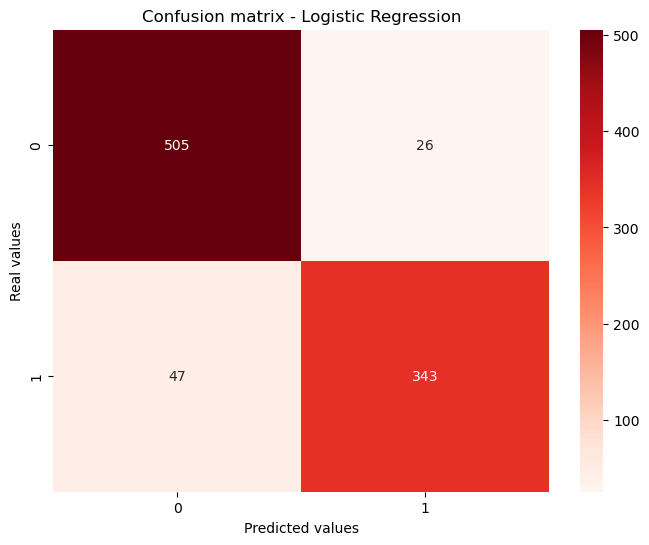

In [77]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted values')
plt.ylabel('Real values')
plt.title('Confusion matrix - Logistic Regression')
plt.show()

Confusion Matrix:

- True Negatives: The model correctly predicted 505 cases as negative class (0).
- False Positives: The model incorrectly predicted 26 cases as positive class (1).
- False Negatives: The model incorrectly predicted 47 cases as negative class (0).
- True Positives: The model correctly predicted 343 cases as positive class (1).

The matrix shows that the model is quite good at distinguishing the positive class, with fewer false positives than false negatives.

### ROC curve visualization

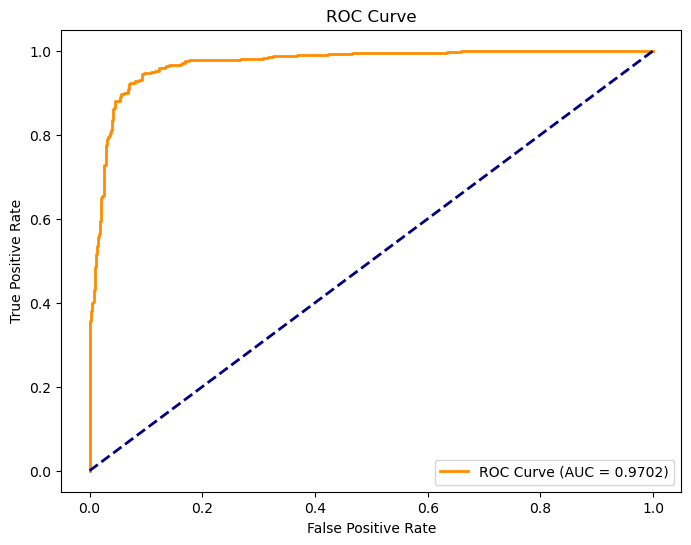

In [78]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

The AUC (Area Under Curve) is 0.9702, which is very high, indicating a strong ability of the model to distinguish between positive and negative classes.

The curve deviates significantly from the diagonal line (representing a random model), which is indicative of good performance.

###  Display Metrics

In [79]:
print(f"Accuracy with the best LogisticRegression model: {accuracy:.4f}")
print("Confusion matrix  :")
print(confusion)

report = classification_report(y_test, y_pred)
print("Classification report :")
print(report)

Accuracy with the best LogisticRegression model: 0.9207
Confusion matrix  :
[[505  26]
 [ 47 343]]
Classification report :
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       531
         1.0       0.93      0.88      0.90       390

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921



### Learning curve

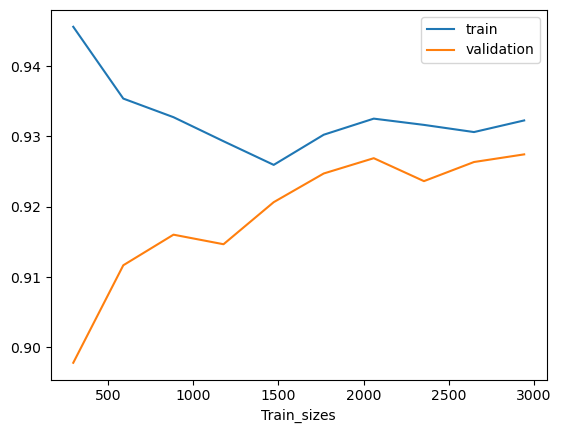

In [80]:
from sklearn.model_selection import learning_curve

N, train_scores, val_scores = learning_curve(best_model_LogisticRegression, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
plt.plot(N, train_scores.mean(axis=1), label="train")
plt.plot(N, val_scores.mean(axis=1), label="validation")
plt.xlabel("Train_sizes")
plt.legend()
plt.show()

The accuracy on the training set slightly decreases as the size of the training set increases, which may indicate that the model is slightly overfitting on small datasets.

The accuracy on the validation set initially increases with the size of the training set but starts to stabilize, indicating that adding more data enhances the model's ability to generalize, up to a certain point.

# 4. Comparative Analysis of Model Performance Metrics

### 4.1 Accuracy

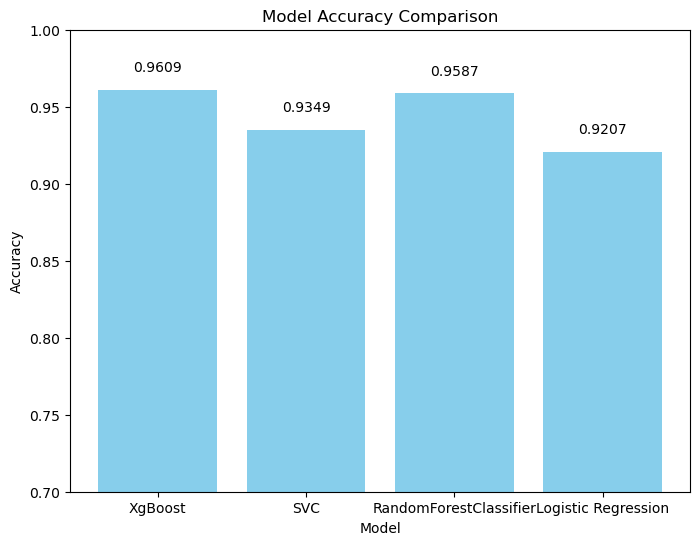

In [82]:
import matplotlib.pyplot as plt

models = [ 'XgBoost', 'SVC', 'RandomForestClassifier', 'Logistic Regression']
accuracy = [0.9609, 0.9349,0.9587 ,0.9207 ]

plt.figure(figsize=(8, 6))


bars = plt.bar(models, accuracy, color='skyblue')


for bar, acc in zip(bars, accuracy):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(acc, 4), ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.7, 1.0)
plt.show()


This chart suggests that XGBoost and RandomForestClassifier are the most performing models for this data, with an accuracy exceeding 95%. The SVC also demonstrates good performance, albeit slightly lower, and logistic regression has the lowest accuracy, although still above 92%.

### AUC

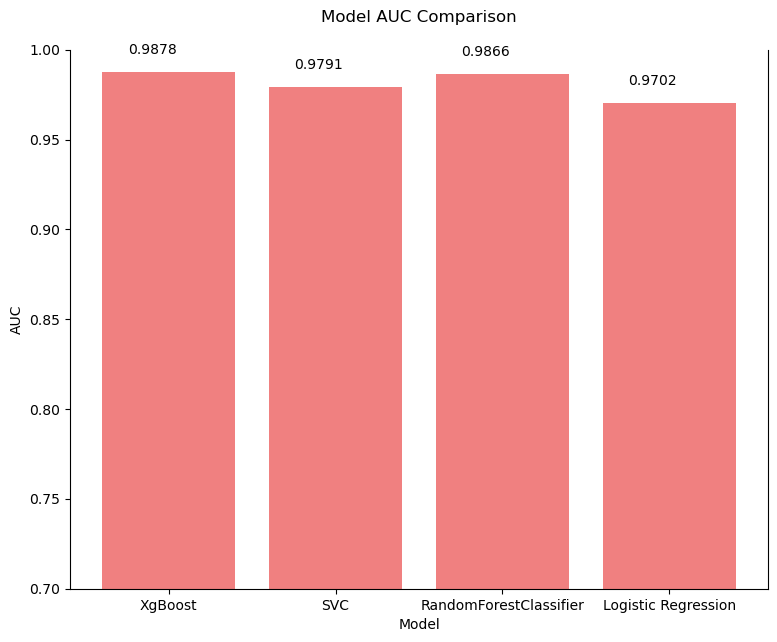

In [24]:
import matplotlib.pyplot as plt
 
models = ['XgBoost', 'SVC', 'RandomForestClassifier', 'Logistic Regression']
auc = [0.9878, 0.9791, 0.9866, 0.9702]
 
plt.figure(figsize=(9, 7))
bars = plt.bar(models, auc, color='lightcoral')
 
plt.xlabel('Model')
plt.ylabel('AUC')
plt.ylim(0.7, 1.0)
 
for bar, auc_value in zip(bars, auc):
    if bar.get_height() < 0.99:
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{auc_value:.4f}', ha='center', color='black')
    else:
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() - 0.04, f'{auc_value:.4f}', ha='center', color='black')
 
plt.title('Model AUC Comparison', pad=20)
plt.gca().spines['top'].set_visible(False)
 
plt.show()


All models exhibit high AUC scores, indicating that they are all quite effective at correctly classifying positive and negative instances. XGBoost and RandomForestClassifier slightly outperform the others.

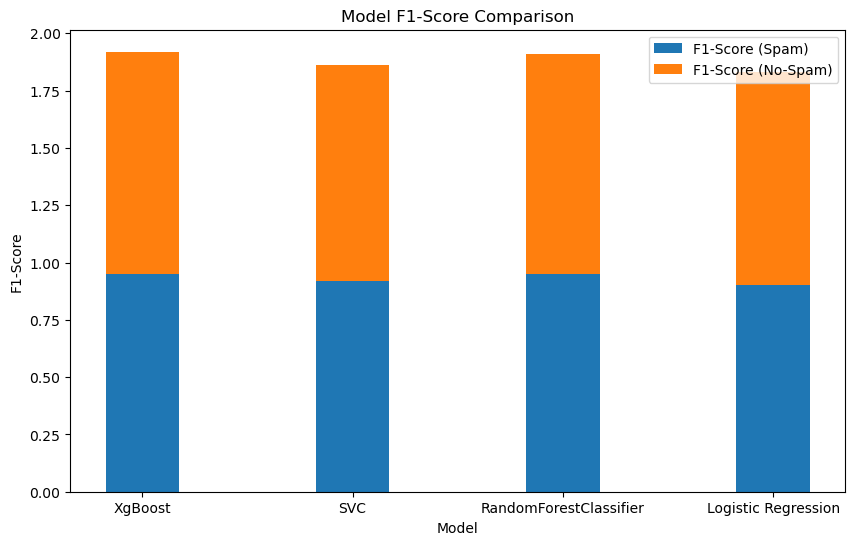

In [90]:
f1_spam = [0.95,0.92  ,0.95 ,0.90 ]
f1_non_spam = [ 0.97 ,0.94 ,0.96 ,0.93 ]

plt.figure(figsize=(10, 6))
width = 0.35
x = range(len(models))
plt.bar(x, f1_spam, width, label='F1-Score (Spam)')
plt.bar(x, f1_non_spam, width, label='F1-Score (No-Spam)', bottom=f1_spam)
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.title('Model F1-Score Comparison')
plt.xticks(x, models)
plt.legend()
plt.show()

The graph illustrates F1 scores for the spam and non-spam classification of four machine learning models.

The F1 score is a metric that combines precision and recall. The XGBoost, SVC, RandomForestClassifier, and Logistic Regression models all exhibit high F1 scores for both classes, indicating good performance. F1 scores for the non-spam class are similar across models, while for the spam class, there are slight variations, but all remain high, indicating effective identification of both spams and non-spams by all models.

# Conclusion 

### Common Features of Spam Emails:

Specific Keywords: Spam emails tend to contain words such as "business," "money," "free," "you," suggesting content focused on financial incentives and attractive offers.

Special Characters: Characters like '!' and '$' are frequently present in spam emails, indicating the common use of urgency tactics and financial incentives.

### Common Features of Non-Spam Emails:

Specific Names and References: Non-spam emails often include specific mentions like proper names ("George") and references to specific terms ("hp," "lab"), suggesting more legitimate and personalized communications.

Specific Characters: Special characters in non-spam emails may vary, but the use of characters like ';' and '[' is observed, indicating a more formal and professional language.

### Determination of the most pertinent model in terms of accuracy, AUC, ROC curve, and validation curve:

Let's analyze the metrics values and the learning curves for each model:

### AUC (Area Under Curve):

- XGBoost: 0.9878
- SVC: 0.9791
- RandomForestClassifier: 0.9866
- Logistic Regression: 0.9702

The AUC is a measure of a model's ability to distinguish between classes.

Based on the AUC scores, XGBoost has the highest AUC, indicating it is the best model at distinguishing between spam and non-spam emails.

### Accuracy:

- XGBoost: 0.9609
- SVC: 0.9349
- RandomForestClassifier: 0.9587
- Logistic Regression: 0.9207

Accuracy measures how often the classifier makes the correct prediction.

It's the ratio of the number of correct predictions to the total number of predictions. 

XGBoost again shows the highest accuracy, making it the most accurate model among those evaluated.

### Learning Curves:

- The learning curve for XGBoost shows a high level of performance on the training set that remains consistent even as more data is added, indicating a good fit to the training data without significant overfitting. The validation score is also increasing, which suggests good generalization to unseen data.



- The SVC curve shows a stable performance on the training set and an increasing trend in the validation score, which indicates good generalization, though it starts from a lower score compared to XGBoost.

- The learning curve for RandomForestClassifier shows a very high training score that doesn't improve much with more data, suggesting a possible overfit to the training set. The validation score improves with more data but does not reach the level of XGBoost.


- Logistic Regression has a more erratic learning curve with more fluctuation in the validation scores. However, both training and validation scores converge as more data is added, suggesting that with more data, the model would potentially improve.


### Considering all these aspects, XGBoost stands out as the most pertinent model for this task. It not only has the highest AUC and accuracy but also displays a strong learning curve that suggests it is well-suited to both the training data and generalizing to new, unseen data.


The learning curves of the other models, while indicative of good performance, do not outperform the XGBoost model in these metrics.